
<img src="https://images.ctfassets.net/37l920h5or7f/1AFrzJRVa50waAAYXAMLox/5fec63619a9e18c1a93a04ceabaa0da8/logo_dont_1.png?fm=jpg&q=70&w=1600" style="width:500px; float: right; margin: 0 0px 0px 0px;"></img>
# Uber trip data analysis
This dataset is taken from the FiveThirtyEight who obtained the data from the NYC Taxi & Limousine Commission (TLC) by submitting a Freedom of Information Law request on July 20, 2015. 

<b>Uber trip data from 2014</b><br>
There are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:

`Date/Time` : The date and time of the Uber pickup<br>
`Lat` : The latitude of the Uber pickup<br>
`Lon` : The longitude of the Uber pickup<br>
`Base` : The TLC base company code affiliated with the Uber pickup<br>

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Populating the notebook with Uber trip data

In [2]:
data = pd.read_csv('C:/Users/Sajid/Downloads/uber-raw-data-apr14.csv/uber-raw-data-apr14.csv')
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [3]:
#To view a specific column of data
data['Lat']

0         40.7690
1         40.7267
2         40.7316
3         40.7588
4         40.7594
           ...   
564511    40.7640
564512    40.7629
564513    40.7443
564514    40.6756
564515    40.6880
Name: Lat, Length: 564516, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


### Converting datetime and some useful columns

Adding `data['Date/Time']` replaces the original data's column with the pandas `to_datetime`. This converts string date and time into pandas format of date and time. To check if this has happened, select one of the dates and `Timestamp: ` should occur

In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [6]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [7]:
data['Date/Time'][0]

Timestamp('2014-04-01 00:11:00')

In [8]:
#This is how we can access the day this entry occured 
dt = data['Date/Time'][0]
dt.day

1

In [9]:
def get_dom(dt):
    return dt.day

In [10]:
data['DoM'] = data['Date/Time'].map(get_dom)

In [11]:
data.head()

,Date/Time,Lat,Lon,Base,DoM
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [12]:
def get_weekday(dt):
    return dt.weekday()
def get_hour(dt):
    return dt.hour

In [13]:
data['Weekday'] = data['Date/Time'].map(get_weekday)

data['Hour'] = data['Date/Time'].map(get_hour)

In [14]:
data.tail()

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


### Analysis

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

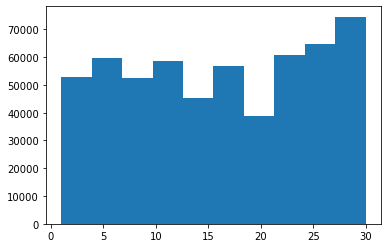

In [15]:
hist(data.DoM)

Text(0.5, 1.0, 'Frequency by Date of Month of April 2014')

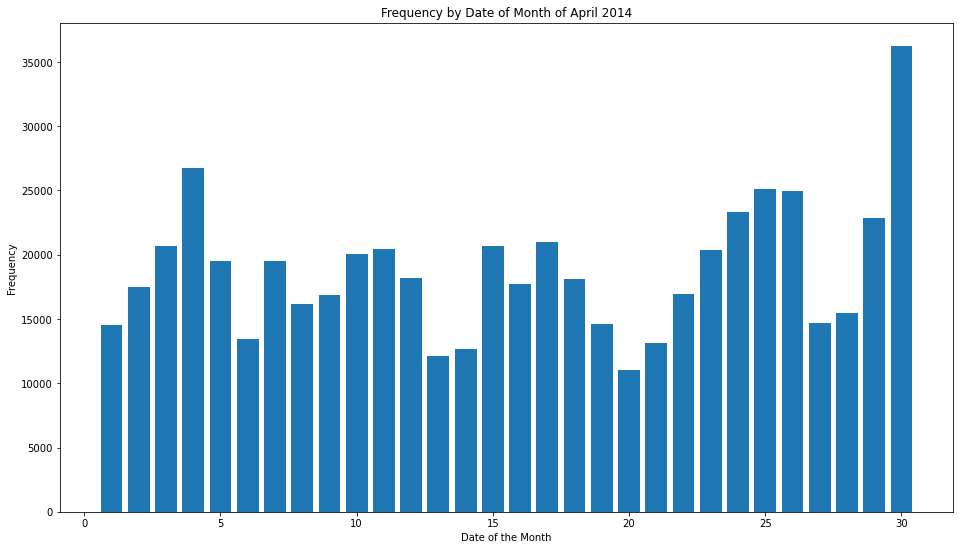

In [16]:
figure(figsize=(16,9))
hist(data.DoM, bins = 30, rwidth=0.8, range=(0.5,30.5))
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by Date of Month of April 2014')

We want to group the days of the month together. We do a for loop where k is the weekday and rows is all the rows in the data corresponding to this k. When k is 1, it groups the rows corresponding to weekday 1 and prints.

In [17]:
for k, rows in data.groupby('DoM'):
    print((k,rows))
    break

(1,                  Date/Time      Lat      Lon    Base  DoM  Weekday  Hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1        1    23
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1        1    23
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1        1    23
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1        1    23
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1        1    23

[14546 rows x 7 columns])


In [18]:
for k, rows in data.groupby('DoM'):
    print((k,len(rows)))
    #The lenght command gives you the number of records for each weekday

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


Groupby cuts the data into large chunks for each day of the month and then passes it through the `count_rows` function which counts the number of rows

In [19]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('DoM').apply(count_rows)
by_date

DoM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

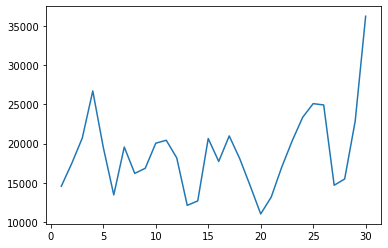

In [20]:
plot(by_date)

<BarContainer object of 30 artists>

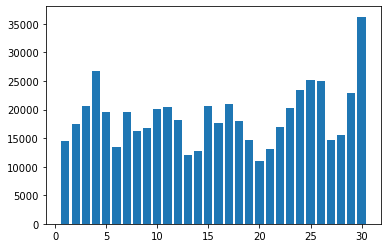

In [21]:
bar(range(1, 31), by_date)

We can sort the data from in order of weekdays to order of rides from smallest to largest using `.sort_values()`.

In [22]:
by_date_sorted = by_date.sort_values()
by_date_sorted

DoM
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

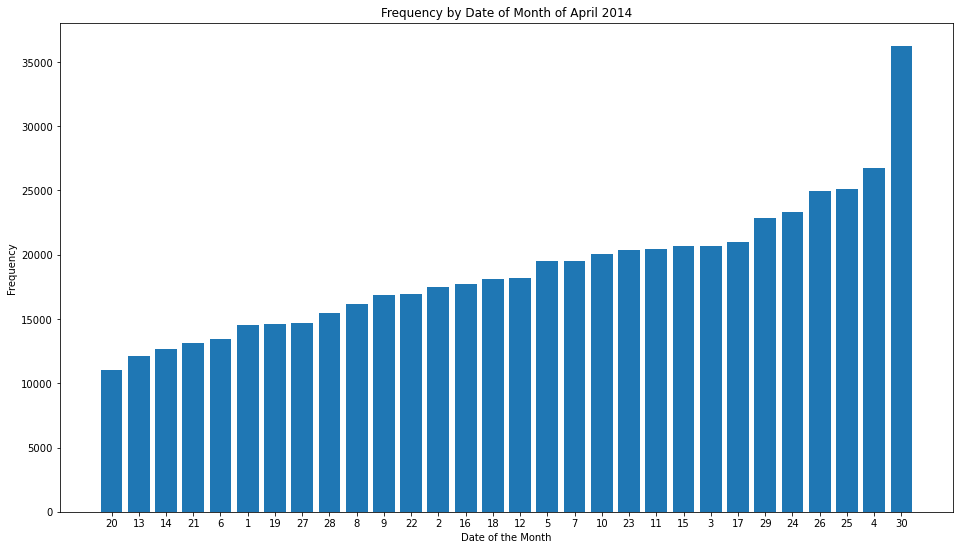

In [23]:
figure(figsize=(16,9))
bar(range(1, 31), by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by Date of Month of April 2014');

### Analysis by Hours

(array([ 24614.,  11135.,  27974.,  65706.,  36639.,  42028., 104517.,
         88478.,  75167.,  88258.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

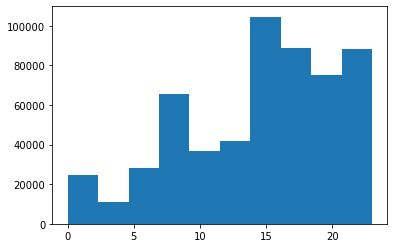

In [24]:
hist(data.Hour)

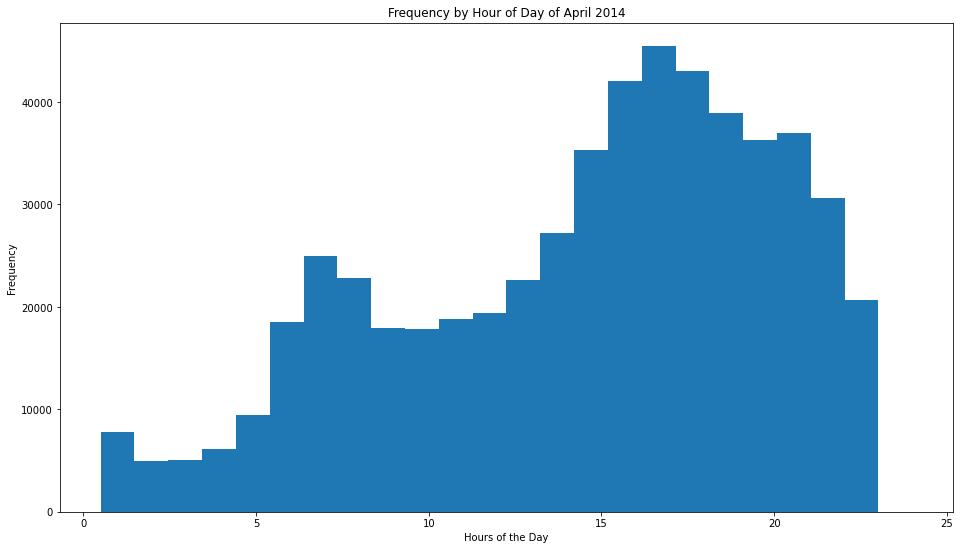

In [25]:
figure(figsize=(16,9))
hist(data.Hour, bins=24, range = (0.5,24))
xlabel('Hours of the Day')
ylabel('Frequency')
title('Frequency by Hour of Day of April 2014');

### Analysis by Weekday

(array([ 60861.,  91185.,      0., 108631.,      0.,  85067.,  90303.,
             0.,  77218.,  51251.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

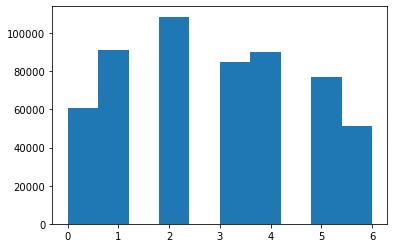

In [26]:
hist(data.Weekday)

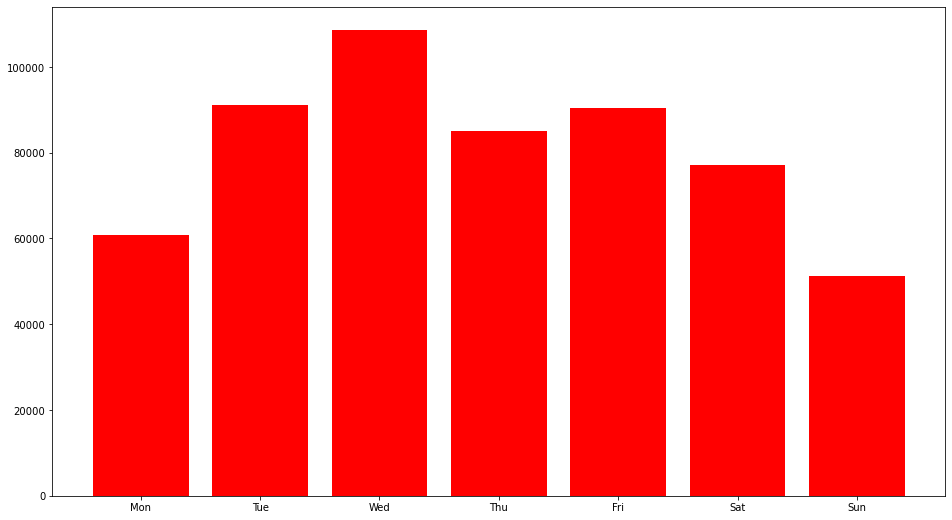

In [27]:
figure(figsize=(16,9))
hist(data.Weekday, bins=7, range=(-0.5,6.5), rwidth=0.8, color='red')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

### Cross Analysis between Hours and Day of the Week

In [28]:
count_rows(data)

564516

In [29]:
by_cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


This groups the data by the hour 0 first then the weekday number from 0 1 2... and counts the rows which is one ride per row.

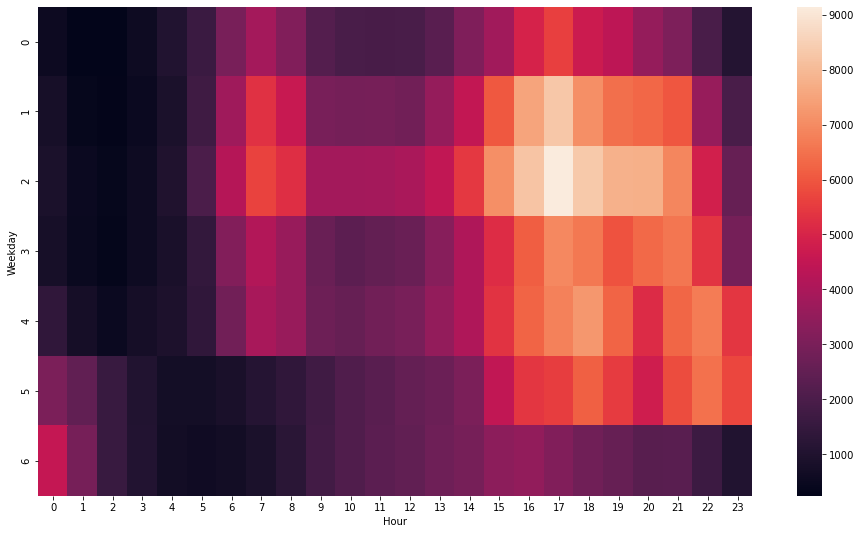

In [30]:
figure(figsize=(16,9))
sns.heatmap(by_cross)

Looking at the heatmap from `Seaborn`, we can see that the most frequent uber trips are made during the later parts of the day. There is strong peak on Wednesday around 16:00 hours, perhaps due to office workers leaving work. The worst hours for trips are around the early morning 00:00 hours during the weekdays.

### By Latitude and Longitude

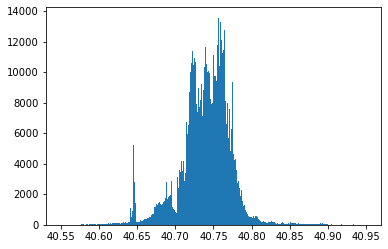

In [31]:
hist(data['Lat'], bins=300,range = (40.55,40.95));

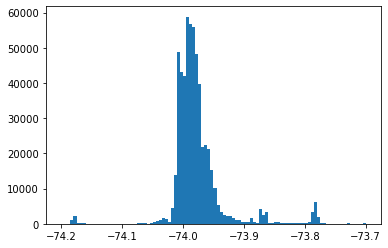

In [32]:
hist(data['Lon'], bins=100, range= (-74.2,-73.7));

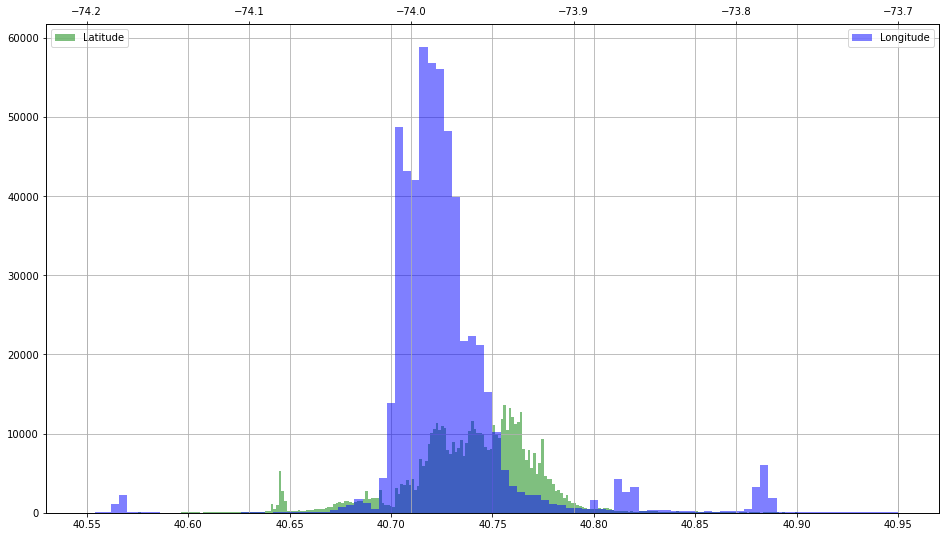

In [33]:
figure(figsize=(16,9))
hist(data['Lat'], bins=300,range = (40.55,40.95), color='green', alpha = 0.5, label= 'Latitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lon'], bins=100, range= (-74.2,-73.7), color='blue', alpha = 0.5, label= 'Longitude')
grid()
legend(loc='best');

(0.0, 100.0)

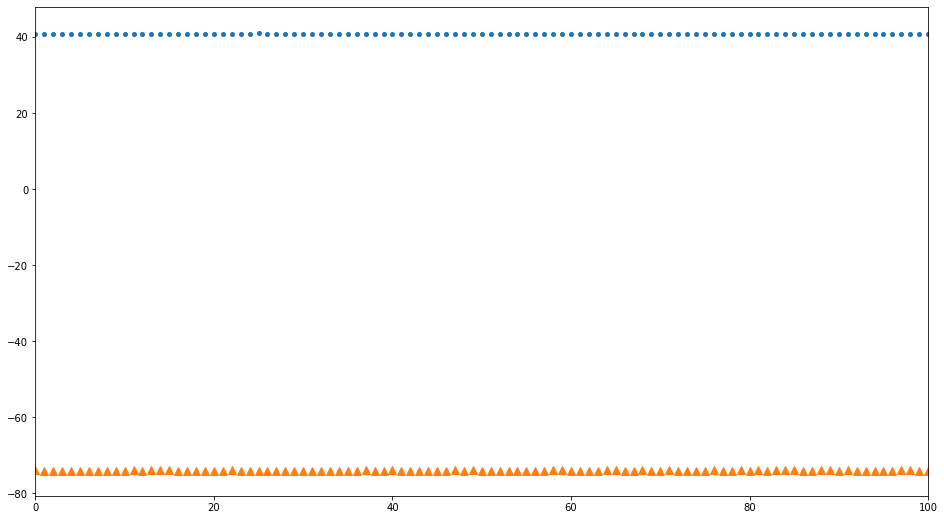

In [34]:
figure(figsize=(16,9))
plot(data['Lat'], '.', ms=8, label='Lat')
plot(data['Lon'], '^', ms=8, label='Lon')

xlim(0,100)

Text(0.5, 1.0, 'Plot of Latitude and Longitude')

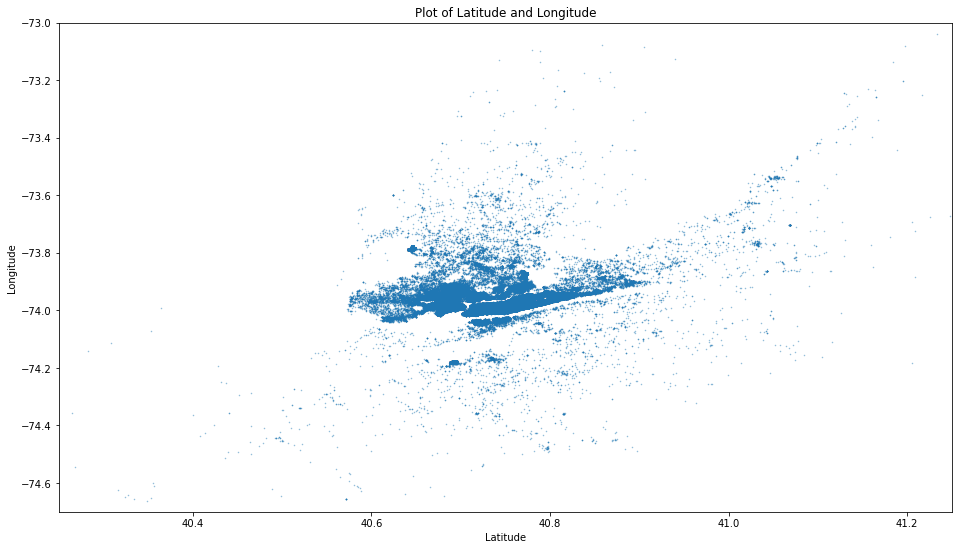

In [35]:
figure(figsize=(16,9))
plot(data['Lat'], data['Lon'], '.', ms=1, alpha=0.5)
xlim(40.25,41.25)
ylim(-74.7,-73.0)
xlabel('Latitude')
ylabel('Longitude')
title('Plot of Latitude and Longitude')